Linear Kernel:
Accuracy: 0.956140350877193
Confusion Matrix:
 [[68  3]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


RBF Kernel:
Accuracy: 0.9824561403508771
Confusion Matrix:
 [[71  0]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Polynomial Kernel:
Accuracy: 0.868421052631579
Confusion Matrix:
 [[71  0]
 [15 28]]
Classification Report:
               precision    

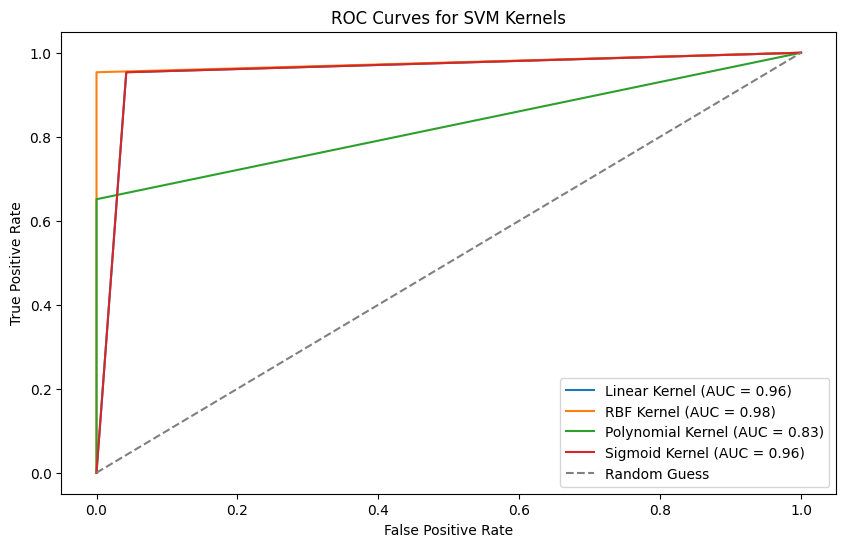

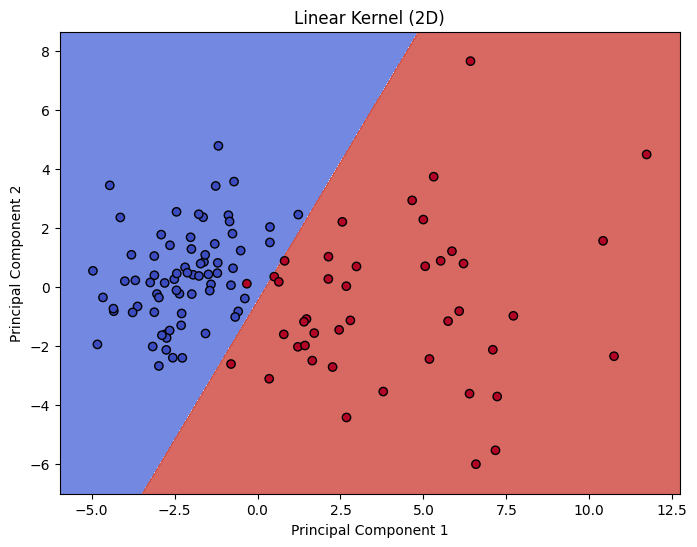

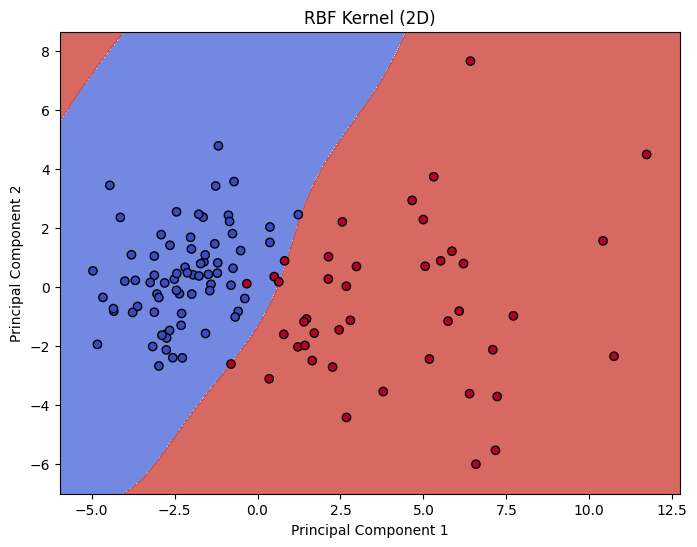

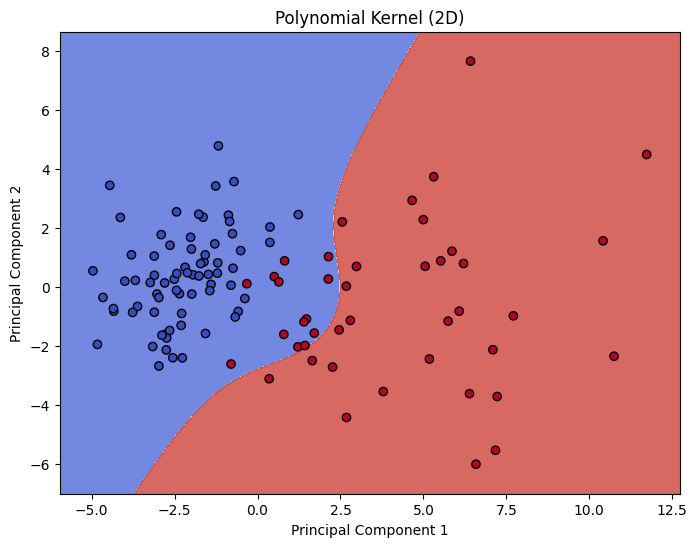

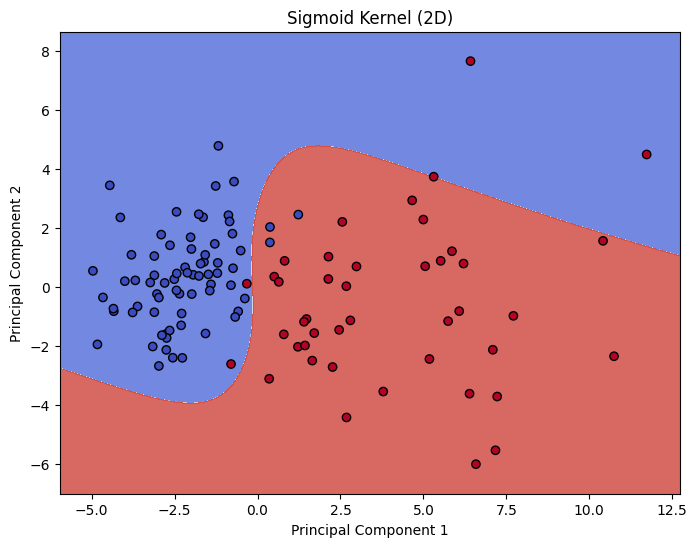

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("breast-cancer.csv")

# Drop the 'id' column as it is not useful for classification
data.drop(columns=["id"], inplace=True)

# Encode the target variable (diagnosis) into binary values
label_encoder = LabelEncoder()
data["diagnosis"] = label_encoder.fit_transform(data["diagnosis"])

# Split the dataset into features (X) and target (y)
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM with Linear Kernel
linear_svm = SVC(kernel="linear", random_state=42)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

# SVM with RBF Kernel
rbf_svm = SVC(kernel="rbf", random_state=42)
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

# SVM with Polynomial Kernel
poly_svm = SVC(kernel="poly", degree=3, random_state=42)
poly_svm.fit(X_train, y_train)
y_pred_poly = poly_svm.predict(X_test)

# SVM with Sigmoid Kernel
sigmoid_svm = SVC(kernel="sigmoid", random_state=42)
sigmoid_svm.fit(X_train, y_train)
y_pred_sigmoid = sigmoid_svm.predict(X_test)

# Evaluate Linear Kernel
print("Linear Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

# Evaluate RBF Kernel
print("\nRBF Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

# Evaluate Polynomial Kernel
print("\nPolynomial Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("Classification Report:\n", classification_report(y_test, y_pred_poly))

# Evaluate Sigmoid Kernel
print("\nSigmoid Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_sigmoid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sigmoid))
print("Classification Report:\n", classification_report(y_test, y_pred_sigmoid))

# Plot ROC Curves for each kernel
plt.figure(figsize=(10, 6))
for kernel, y_pred in zip(["Linear", "RBF", "Polynomial", "Sigmoid"], [y_pred_linear, y_pred_rbf, y_pred_poly, y_pred_sigmoid]):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{kernel} Kernel (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for SVM Kernels")
plt.legend()
plt.show()

# Reduce dimensions to 2D using PCA
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train)
X_test_2d = pca_2d.transform(X_test)

# Train SVM models on 2D data
linear_svm_2d = SVC(kernel="linear", random_state=42)
linear_svm_2d.fit(X_train_2d, y_train)

rbf_svm_2d = SVC(kernel="rbf", random_state=42)
rbf_svm_2d.fit(X_train_2d, y_train)

poly_svm_2d = SVC(kernel="poly", degree=3, random_state=42)
poly_svm_2d.fit(X_train_2d, y_train)

sigmoid_svm_2d = SVC(kernel="sigmoid", random_state=42)
sigmoid_svm_2d.fit(X_train_2d, y_train)

# Function to plot decision boundaries in 2D
def plot_2d_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Plot 2D decision boundaries for each kernel
plot_2d_decision_boundary(X_test_2d, y_test, linear_svm_2d, "Linear Kernel (2D)")
plot_2d_decision_boundary(X_test_2d, y_test, rbf_svm_2d, "RBF Kernel (2D)")
plot_2d_decision_boundary(X_test_2d, y_test, poly_svm_2d, "Polynomial Kernel (2D)")
plot_2d_decision_boundary(X_test_2d, y_test, sigmoid_svm_2d, "Sigmoid Kernel (2D)")